Грузим датасет:

In [1]:
cd ..

/home/bfilippov/kaggle/whiteboard


In [2]:
import keras
import pandas as pd
import ast

train = pd.read_csv('source/train.csv')
test = pd.read_csv('source/test.csv')
train['labels'] = train['labels'].map(ast.literal_eval)
test['labels'] = test['labels'].map(ast.literal_eval)

Using TensorFlow backend.


Объявляем модель:

In [3]:
%load_ext autoreload
%autoreload 2
import tensorflow as tf

from keras.layers import Input
from keras import backend as K

from models.model_zoo import lenet_like_convnet, whiteboard_detector, whiteboard_loss
from models.image_generator import whiteboard_images

sess = tf.Session()
K.set_session(sess)

input_height = 128
input_width = 128

input_image = Input(shape=(input_height, input_width, 3))
lenet = lenet_like_convnet(input_image)

simple_detector = whiteboard_detector(input_image, lenet)

simple_detector.compile(optimizer='adam', loss=whiteboard_loss)


Учим модель:

In [4]:
img_dir = 'source/'
img_size = (input_height, input_width)

imgs = whiteboard_images(train, img_dir, img_size)

simple_detector.fit_generator(imgs, samples_per_epoch=2000, nb_epoch=10)

Epoch 1/10
2016/2000 [==============================] - 302s - loss: 12528.8165   

/home/bfilippov/anaconda3/lib/python3.5/site-packages/keras/engine/training.py:1480: UserWarning: Epoch comprised more than `samples_per_epoch` samples, which might affect learning results. Set `samples_per_epoch` correctly to avoid this warning.
  warnings.warn('Epoch comprised more than '



Epoch 2/10
2016/2000 [==============================] - 379s - loss: 7960.6490   
Epoch 3/10
2016/2000 [==============================] - 305s - loss: 7299.4519   
Epoch 4/10
2016/2000 [==============================] - 281s - loss: 7004.4273   
Epoch 5/10
2016/2000 [==============================] - 284s - loss: 6920.2372   
Epoch 6/10
2016/2000 [==============================] - 290s - loss: 6512.9919   
Epoch 7/10
2016/2000 [==============================] - 328s - loss: 6525.7926   
Epoch 8/10
2016/2000 [==============================] - 320s - loss: 6208.5694   
Epoch 9/10
2016/2000 [==============================] - 374s - loss: 6267.1711   
Epoch 10/10
2016/2000 [==============================] - 335s - loss: 6159.1340   


In [5]:
valid_imgs = whiteboard_images(test, img_dir, img_size)
valid_batch_input, valid_batch_labels = next(valid_imgs)
predictions = simple_detector.predict_on_batch(valid_batch_input)

Выглядит так что сетка пытается детектировать доску не смотря на её углы:

is present? 1.0


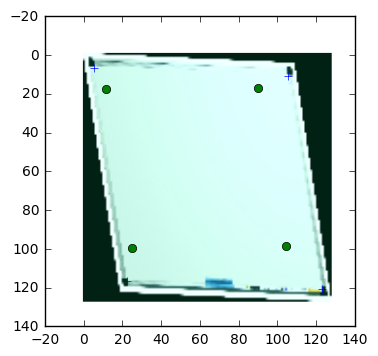

In [10]:
%matplotlib inline
from matplotlib import pyplot as plt

img_ix = 3

plt.imshow(valid_batch_input[img_ix])
plt.plot(valid_batch_labels[img_ix][2:6], valid_batch_labels[img_ix][6:10], '+')
plt.plot(predictions[img_ix][2:6], predictions[img_ix][6:10], 'o')

print("is present?", predictions[img_ix][1])

In [7]:
simple_detector.save('')